In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
time_df = pd.read_csv("time_sheet_framed_paper.csv")

In [3]:
time_df

,Pipeline,Error Rate,Coverage,Start Times,Total Time,Avg Base,Avg Base Mul 1024,Speedup,Worst Node,Worst Node Time,Avg Norm Slowest,Expected Speedup With Slowest Node Slowdown,85 Percentile,Time Min
0,"RS(28,28)",0.05,25,2023-02-09 01:24:56.626000,22339.031,122.950277,125901.084,5.635924,c008n02,2836.655,23.071562,5.547955,109.49585,91.714
1,"RS(0,56)",0.1,15,2023-02-08 21:59:01.317000,11737.625,71.135633,72842.888,6.205931,c008n02,1472.660,20.702142,6.182935,59.05945,47.463
2,"RS(0,56)",0.01,25,2023-02-09 01:02:04.090000,9268.072,62.361981,63858.669,6.890178,c013n02,1182.627,18.963910,6.749663,54.20965,41.621
3,"RS(9,47)",0.05,30,2023-02-09 03:47:18.168000,11591.205,82.301669,84276.909,7.270763,c013n02,1513.397,18.388412,6.960906,70.07160,54.271
4,"RS(14,42)",0.1,10,2023-02-08 19:20:48.964000,5079.160,38.159372,39075.197,7.693240,c013n02,664.244,17.407100,7.353321,33.59870,26.705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,"RS(0,56)",0.01,30,2023-02-09 03:35:15.708000,376.368,44.743088,45816.922,121.734372,c012n03,47.828,1.068947,119.743984,46.17110,41.888
268,"HEDGES(0.75,39)",DNArSim,30,2023-02-16 21:47:07.275000,5446.058,649.371771,664956.694,122.098717,c038n01,734.024,1.130360,113.238241,682.27990,478.685
269,"RS(28,28)",0.01,30,2023-02-09 03:22:05.108000,756.736,90.267026,92433.435,122.147532,c004n03,96.953,1.074069,119.172995,92.78710,84.217
270,"RS(9,47)",0.01,30,2023-02-09 03:05:01.665000,446.895,53.678303,54966.582,122.996637,c004n04,58.930,1.097837,116.592954,55.44330,50.432


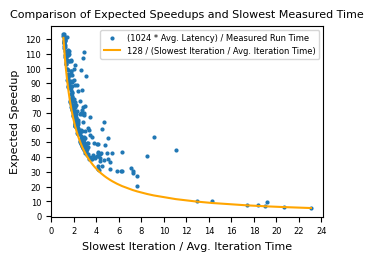

48.57635748970448


In [40]:
x = time_df["Avg Norm Slowest"]
y1 = time_df["Speedup"]
y2 = time_df["Expected Speedup With Slowest Node Slowdown"]
fig,axes = plt.subplots(1,1,figsize=(3.25,2.5),layout="constrained")
axes.scatter(x,y1,s=4.0,label="(1024 * Avg. Latency) / Measured Run Time")
x,y2 = zip(*sorted(zip(x,y2)))
axes.plot(x,y2,linestyle="-",color="orange",label="128 / (Slowest Iteration / Avg. Iteration Time)" )
#axes.hlines(np.percentile(y1,25),min(x),max(x),color='r',linestyle="--")
axes.set_yticks(range(0,130,10))
axes.set_xticks(range(0,25,2))
axes.set_xlabel("Slowest Iteration / Avg. Iteration Time",fontsize=8)
axes.set_ylabel("Expected Speedup",fontsize=8)
axes.tick_params(axis='x', labelsize=6)
axes.tick_params(axis='y', labelsize=6)
plt.legend(fontsize=6)
plt.title("Comparison of Expected Speedups and Slowest Measured Time",fontsize=8)
plt.show(fig)
fig.savefig("timesheet.pdf",format="pdf")
print(np.percentile(y1,25))




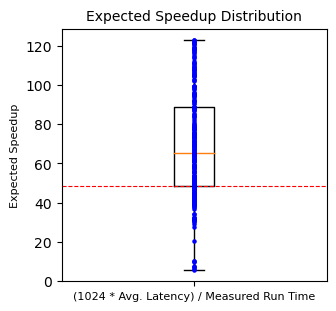

In [38]:
y1 = time_df["Speedup"]
fig,axes = plt.subplots(1,1,figsize=(3.25,3.0),layout="constrained")

axes.boxplot(y1,labels=["(1024 * Avg. Latency) / Measured Run Time"])
plt.scatter([1]*len(y1), y1, alpha=1, color='b',s=5.0,zorder=10)
axes.tick_params(axis='x', labelsize=8)
#axes.hlines(np.percentile(y1,25),min(x),max(x),color='r',linestyle="--")
axes.set_ylabel("Expected Speedup",fontsize=8)
plt.title("Expected Speedup Distribution",fontsize=10)
axes.hlines(np.percentile(y1,25),0.5,1.5,color='r',linestyle="--",linewidth=0.8)
plt.show(fig)
fig.savefig("box_plot_speedup.pdf",format="pdf")


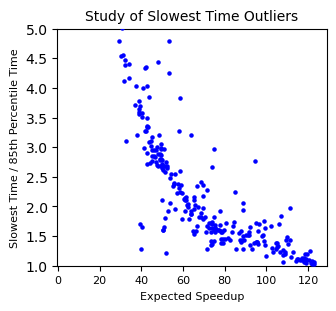

In [74]:
y = time_df["85 Percentile"]
y2 = time_df["Worst Node Time"]
y1=(y2/y)
fig,axes = plt.subplots(1,1,figsize=(3.25,3.0),layout="constrained")
plt.scatter(time_df["Speedup"], y1, alpha=1, color='b',s=5.0,zorder=10)

axes.tick_params(axis='x', labelsize=8)
#axes.set_xlim([20,120])
axes.set_ylim([1,5])
axes.set_ylabel("Slowest Time / 85th Percentile Time",fontsize=8)
axes.set_xlabel("Expected Speedup",fontsize=8)

plt.title("Study of Slowest Time Outliers",fontsize=10)
plt.show(fig)
fig.savefig("outlier.pdf",format="pdf")
